PCA and ICA for Gaussian Noise with sigma = 0.5
Reconstruction Error for ica: 423.49531337680423
Reconstruction Error for pca: 313.7871292290955
PCA and ICA for Gaussian Noise with sigma = 0.75
Reconstruction Error for ica: 444.8718114225127
Reconstruction Error for pca: 351.54544890477894
PCA and ICA for Gaussian Noise with sigma = 1
Reconstruction Error for ica: 463.9248533173957
Reconstruction Error for pca: 296.07491496810695
PCA and ICA for Gaussian Noise with sigma = 1.25
Reconstruction Error for ica: 467.9874712802136
Reconstruction Error for pca: 281.58564167429284
PCA and ICA for Gaussian Noise with sigma = 1.5
Reconstruction Error for ica: 619.4347574835367
Reconstruction Error for pca: 260.0588224695721
PCA and ICA for Gaussian Noise with sigma = 1.75
Reconstruction Error for ica: 468.48489196594414
Reconstruction Error for pca: 256.87960392666014
PCA and ICA for Gaussian Noise with sigma = 2
Reconstruction Error for ica: 470.67751427927266
Reconstruction Error for pca: 273.

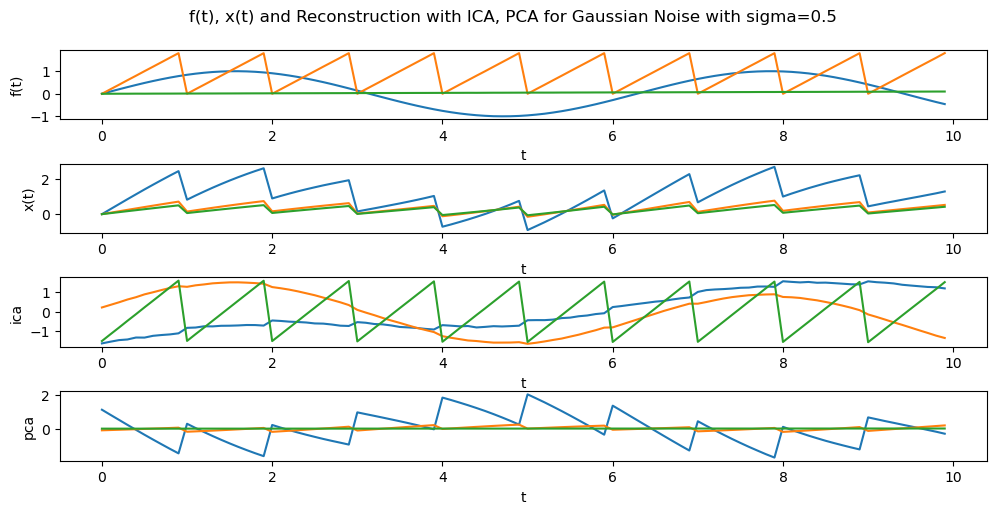

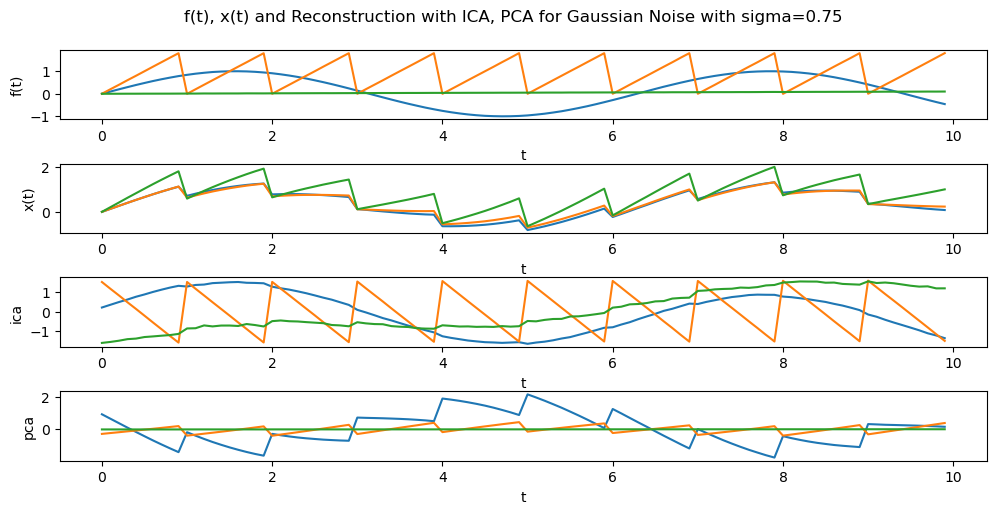

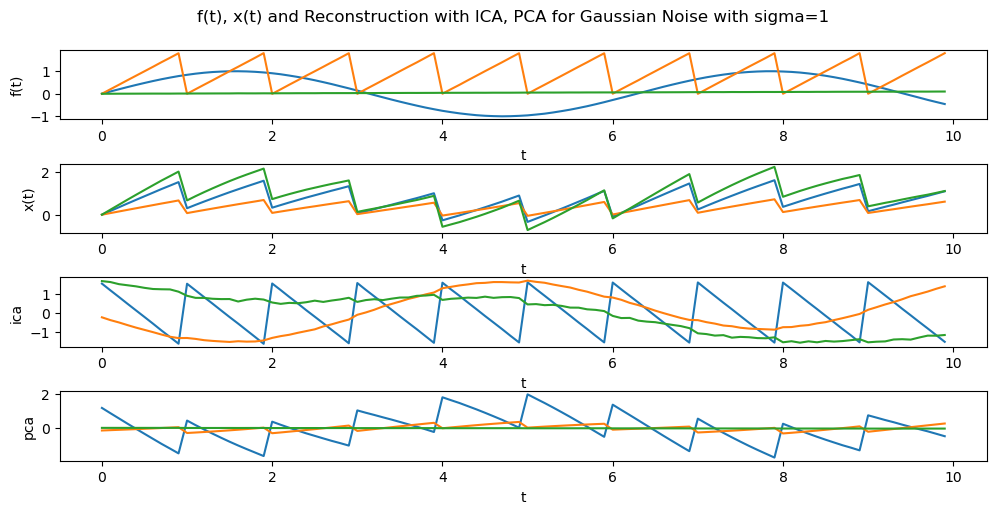

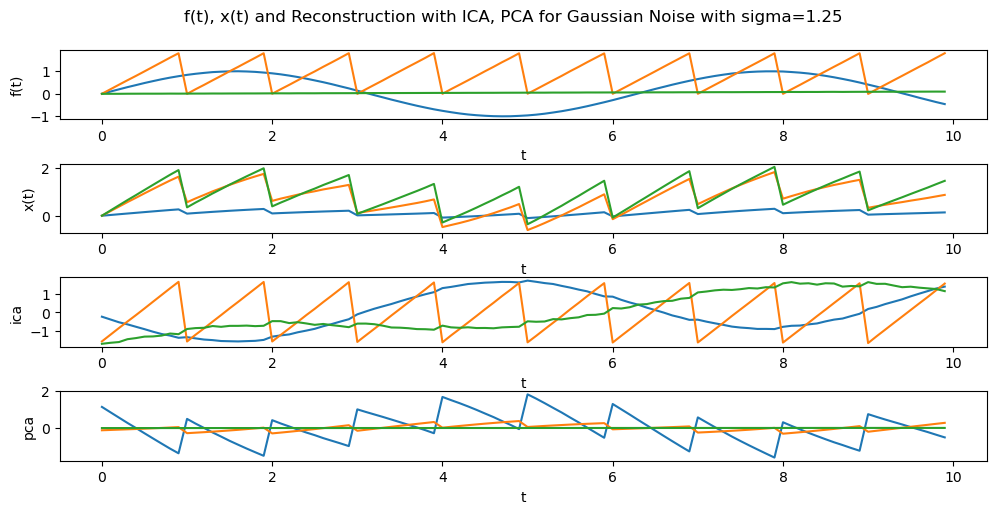

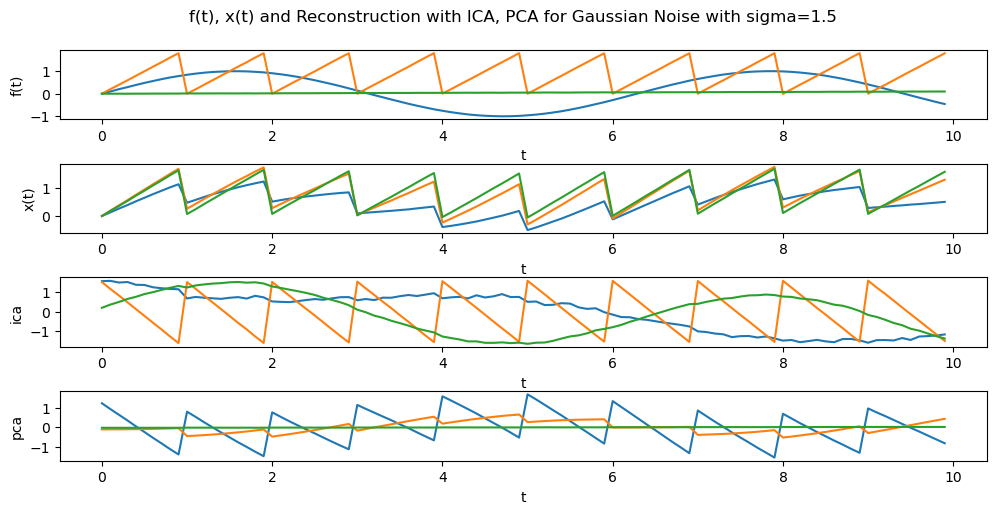

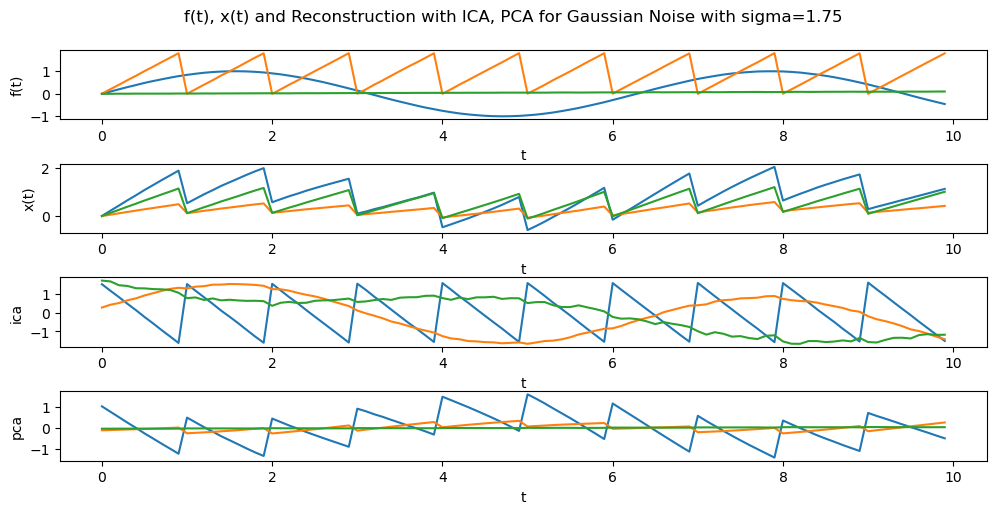

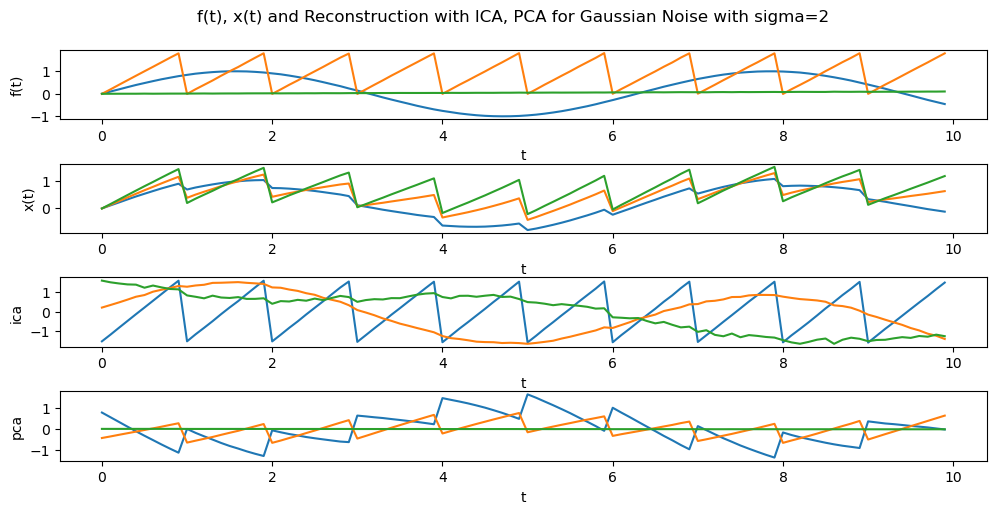

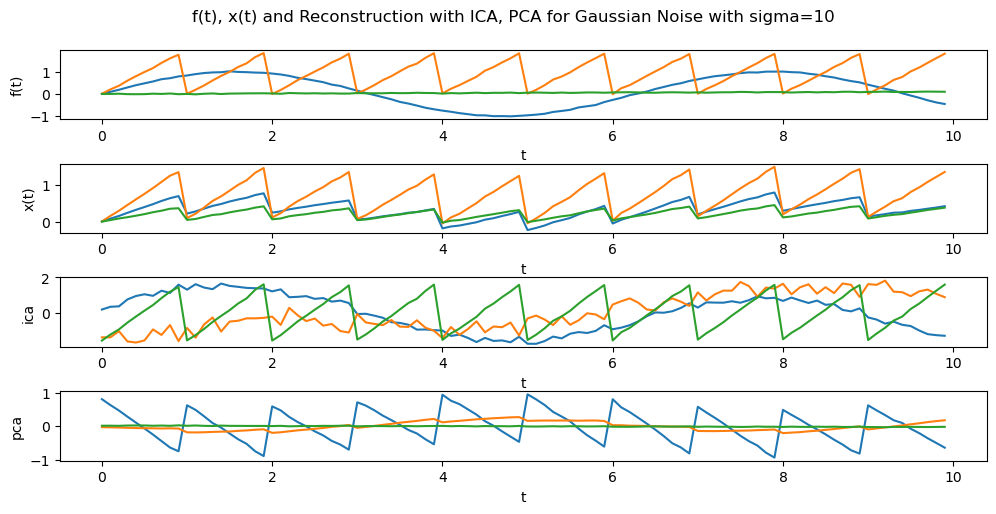

In [59]:
# Exercise 3
# Signal decomposition: Generate three time series of the form f1(t) = sin(t) + 0.001η,
# f2(t) = 2(t − btc) + 0.002η, f3(t) = 0.01t + 0.001η, where η is independent Gaussian
# noise per entry and t is the time. Generate a random 3 × 3 matrix A and compute
# the transformed values ~x(t) = A ·
# ~f(t). Investigate the output of PCA and ICA on
# these data. Does PCA / ICA reconstruct the signals? Use a quantitative evaluation!
# Evaluate the sensitivity with respect to the noise!

# Source: https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py

from sklearn.decomposition import FastICA, PCA
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=420)


sigmas = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 10]

for sigma in sigmas:
    my = 0
    print('PCA and ICA for Gaussian Noise with sigma =', sigma)

    upper_bound = 10
    stepsize = 0.1
    ts = np.arange(0, upper_bound, stepsize)

    etas = rng.normal(my, sigma, (len(ts), 3))

    f1 =  np.sin(ts) + 0.001 * etas[:,0]
    f2 =  2 * (ts - np.floor(ts)) + 0.002 * etas[:,1]
    f3 =  0.01 * ts + 0.001 * etas[:,2]

    f = np.column_stack((f1, f2, f3))

    fig, axs = plt.subplots(4, 1, figsize=(10,5))

    fig.suptitle(f'f(t), x(t) and Reconstruction with ICA, PCA for Gaussian Noise with sigma={sigma}')
    fig.tight_layout()
    axs[0].plot(ts, f)
    axs[0].set_ylabel('f(t)')
    axs[0].set_xlabel('t')

    A = rng.random((3,3))
    X = np.dot(f, A.T) 
    axs[1].plot(ts, X)
    axs[1].set_ylabel('x(t)')
    axs[1].set_xlabel('t')

    ica = FastICA(n_components=3, whiten="unit-variance")
    f_ica = ica.fit_transform(X)
    axs[2].plot(ts, f_ica)
    axs[2].set_ylabel('ica')
    axs[2].set_xlabel('t')

    pca = PCA(n_components=3)
    f_pca = pca.fit_transform(X)
    axs[3].plot(ts, f_pca)
    axs[3].set_ylabel('pca')
    axs[3].set_xlabel('t')

    loss = np.mean(np.sum((f - f_ica)**2))
    print('Reconstruction Error for ica:', loss)

    loss = np.sum((f - f_pca)**2).mean()
    print('Reconstruction Error for pca:', loss)
